# Creating Heatmap Visualization for Transit Matrix

### Importing necessary libraries

In [1]:
%pip install openpyxl 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# setting styles
plt.style.use('default')
sns.set_palette("viridis") # inclusive color map


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Pulling in data

In [4]:
# csv file reading, for this need to read the header
## then read each line, taking string and add to column 
transit_data = pd.read_csv('transit_matrix_all.csv', 
                        index_col=0,
                        header=0)

# Convert to numeric (handles any non-numeric values)
transit_data = transit_data.apply(pd.to_numeric, errors='coerce')

print(f"Matrix shape: {transit_data.shape}")
#print(f"Data types:\n{transit_data.dtypes}")
print(transit_data.head())


Matrix shape: (411, 411)
       FQHC1  FQHC2       FQHC3  FQHC4       FQHC5       FQHC6  FQHC7  FQHC8  \
FQHC1    0.0    NaN         NaN    NaN         NaN         NaN    NaN    NaN   
FQHC2    NaN    0.0         NaN    NaN         NaN         NaN    NaN    NaN   
FQHC3    NaN    NaN    0.000000    NaN  971.533333  876.383333    NaN    NaN   
FQHC4    NaN    NaN         NaN    0.0         NaN         NaN    NaN    NaN   
FQHC5    NaN    NaN  703.833333    NaN    0.000000  143.950000    NaN    NaN   

       FQHC9  FQHC10  ...  PPHC101  PPHC102    PPHC103  PPHC104  PPHC105  \
FQHC1    NaN     NaN  ...      NaN      NaN        NaN      NaN      NaN   
FQHC2    NaN     NaN  ...      NaN      NaN        NaN      NaN      NaN   
FQHC3    NaN     NaN  ...      NaN   154.85        NaN      NaN      NaN   
FQHC4    NaN     NaN  ...      NaN      NaN  97.916667      NaN      NaN   
FQHC5    NaN     NaN  ...      NaN   134.10        NaN      NaN      NaN   

          PPHC106  PPHC107  PPHC108  

In [5]:
# xlxs file reading
'''transit_data = pd.read_excel('transit_matrix_all.xlsx', 
                        #sheet_name='Matrix_Data',  # Sheet name
                        index_col=0,               # First column as index
                        header=0)                  # First row as headers

# Convert to numeric
transit_data = transit_data.apply(pd.to_numeric, errors='coerce')

print(f"Data shape: {transit_data.shape}")
print("First few rows:")
print(transit_data.head())'''

'transit_data = pd.read_excel(\'transit_matrix_all.xlsx\', \n                        #sheet_name=\'Matrix_Data\',  # Sheet name\n                        index_col=0,               # First column as index\n                        header=0)                  # First row as headers\n\n# Convert to numeric\ntransit_data = transit_data.apply(pd.to_numeric, errors=\'coerce\')\n\nprint(f"Data shape: {transit_data.shape}")\nprint("First few rows:")\nprint(transit_data.head())'

In [6]:
# Cleaning data 
transit_data = transit_data.fillna(0)  # Fill NaN values with 0
print(transit_data.head())

       FQHC1  FQHC2       FQHC3  FQHC4       FQHC5       FQHC6  FQHC7  FQHC8  \
FQHC1    0.0    0.0    0.000000    0.0    0.000000    0.000000    0.0    0.0   
FQHC2    0.0    0.0    0.000000    0.0    0.000000    0.000000    0.0    0.0   
FQHC3    0.0    0.0    0.000000    0.0  971.533333  876.383333    0.0    0.0   
FQHC4    0.0    0.0    0.000000    0.0    0.000000    0.000000    0.0    0.0   
FQHC5    0.0    0.0  703.833333    0.0    0.000000  143.950000    0.0    0.0   

       FQHC9  FQHC10  ...  PPHC101  PPHC102    PPHC103  PPHC104  PPHC105  \
FQHC1    0.0     0.0  ...      0.0     0.00   0.000000      0.0      0.0   
FQHC2    0.0     0.0  ...      0.0     0.00   0.000000      0.0      0.0   
FQHC3    0.0     0.0  ...      0.0   154.85   0.000000      0.0      0.0   
FQHC4    0.0     0.0  ...      0.0     0.00  97.916667      0.0      0.0   
FQHC5    0.0     0.0  ...      0.0   134.10   0.000000      0.0      0.0   

          PPHC106  PPHC107  PPHC108     PPHC109     PPHC110  


##### Heatmap 

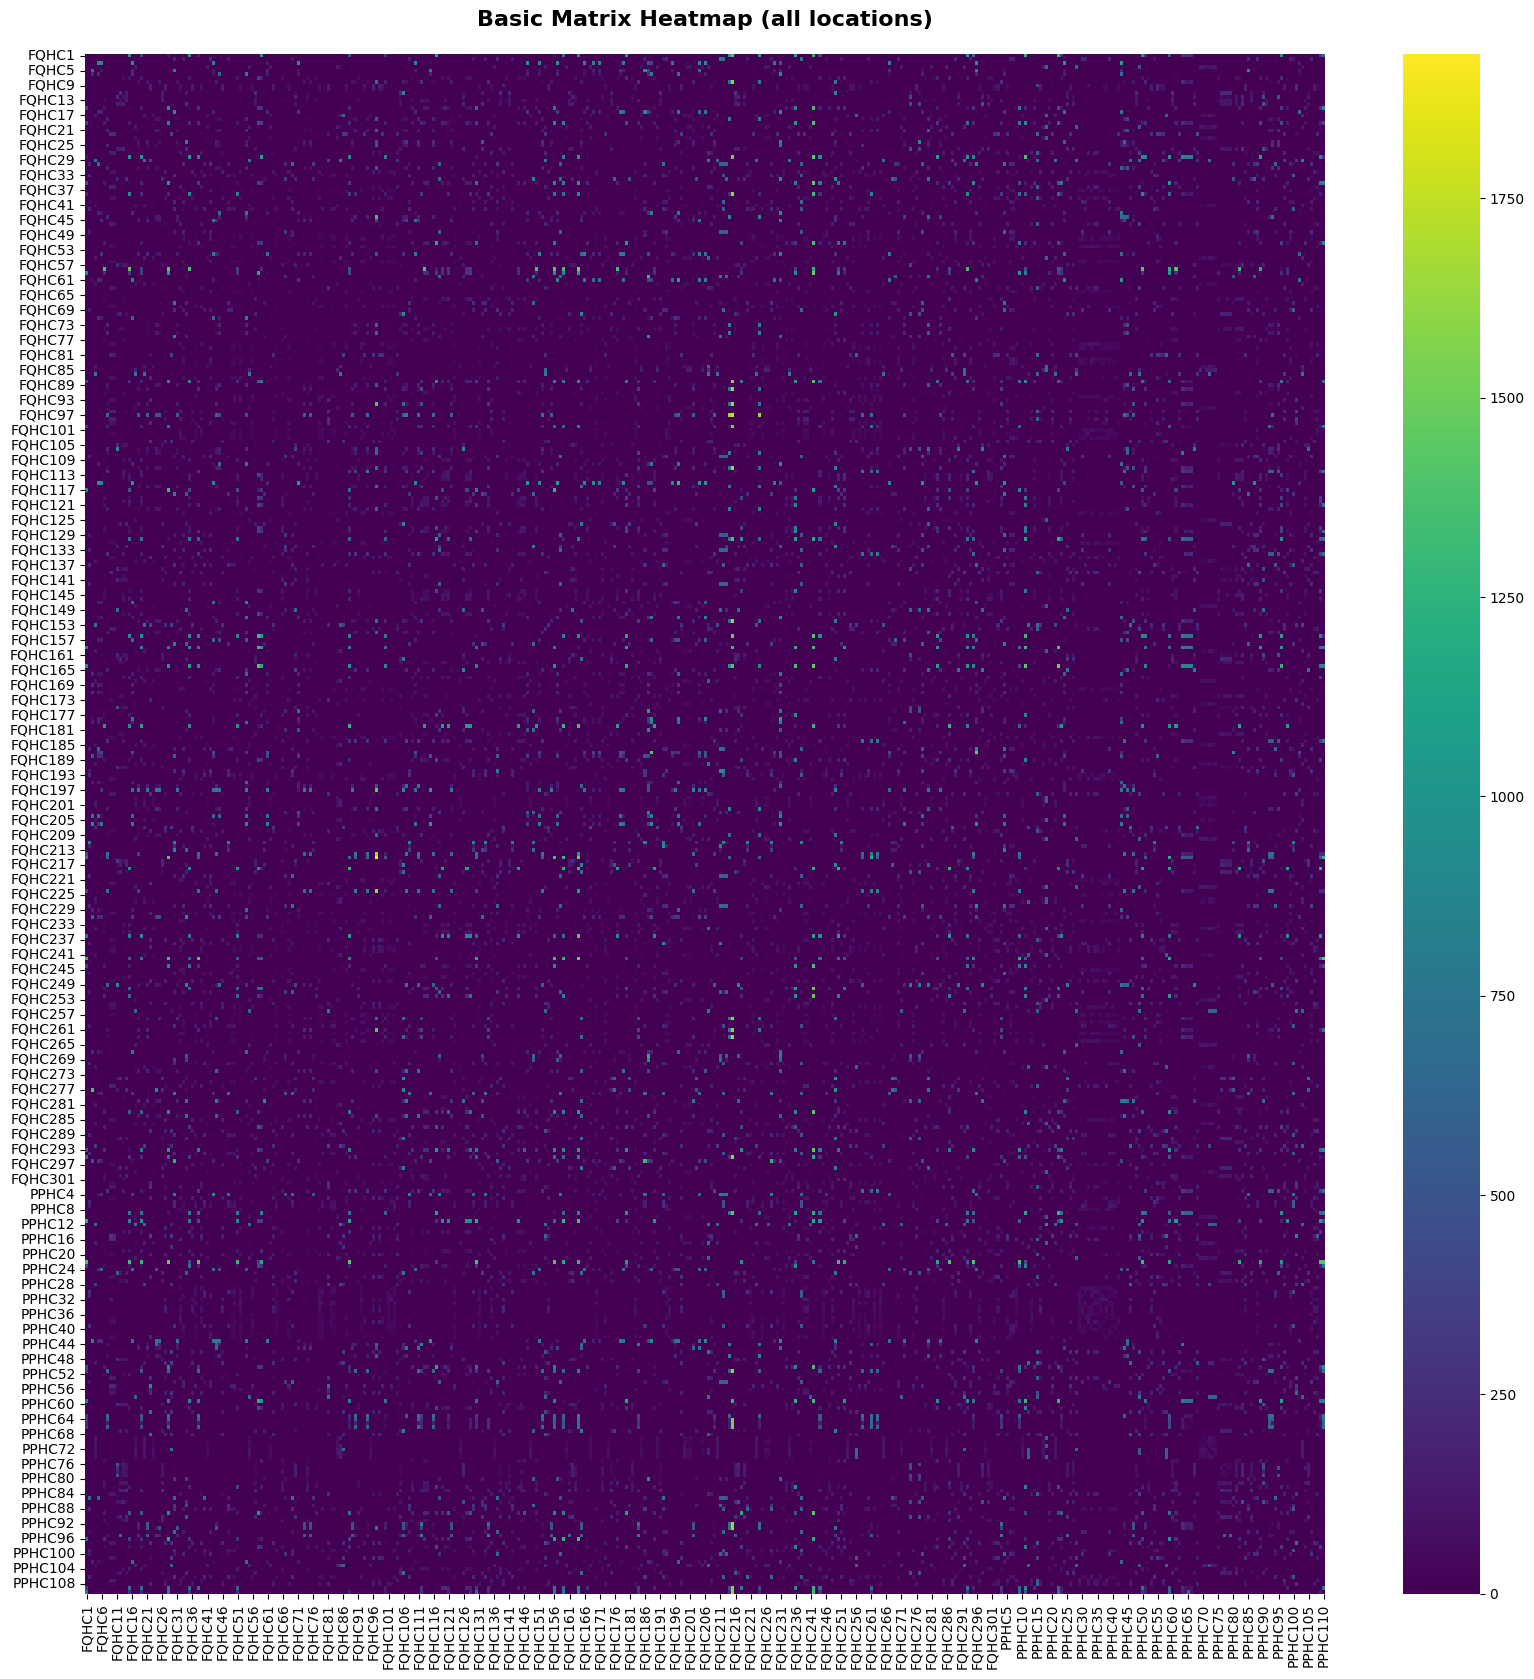

In [7]:
# Basic Heatmap
plt.figure(figsize=(20, 20))

sns.heatmap(transit_data, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap (all locations)", fontsize=16, fontweight='bold', pad=20)
plt.show()

#### Creating heatmap 100 x 100  

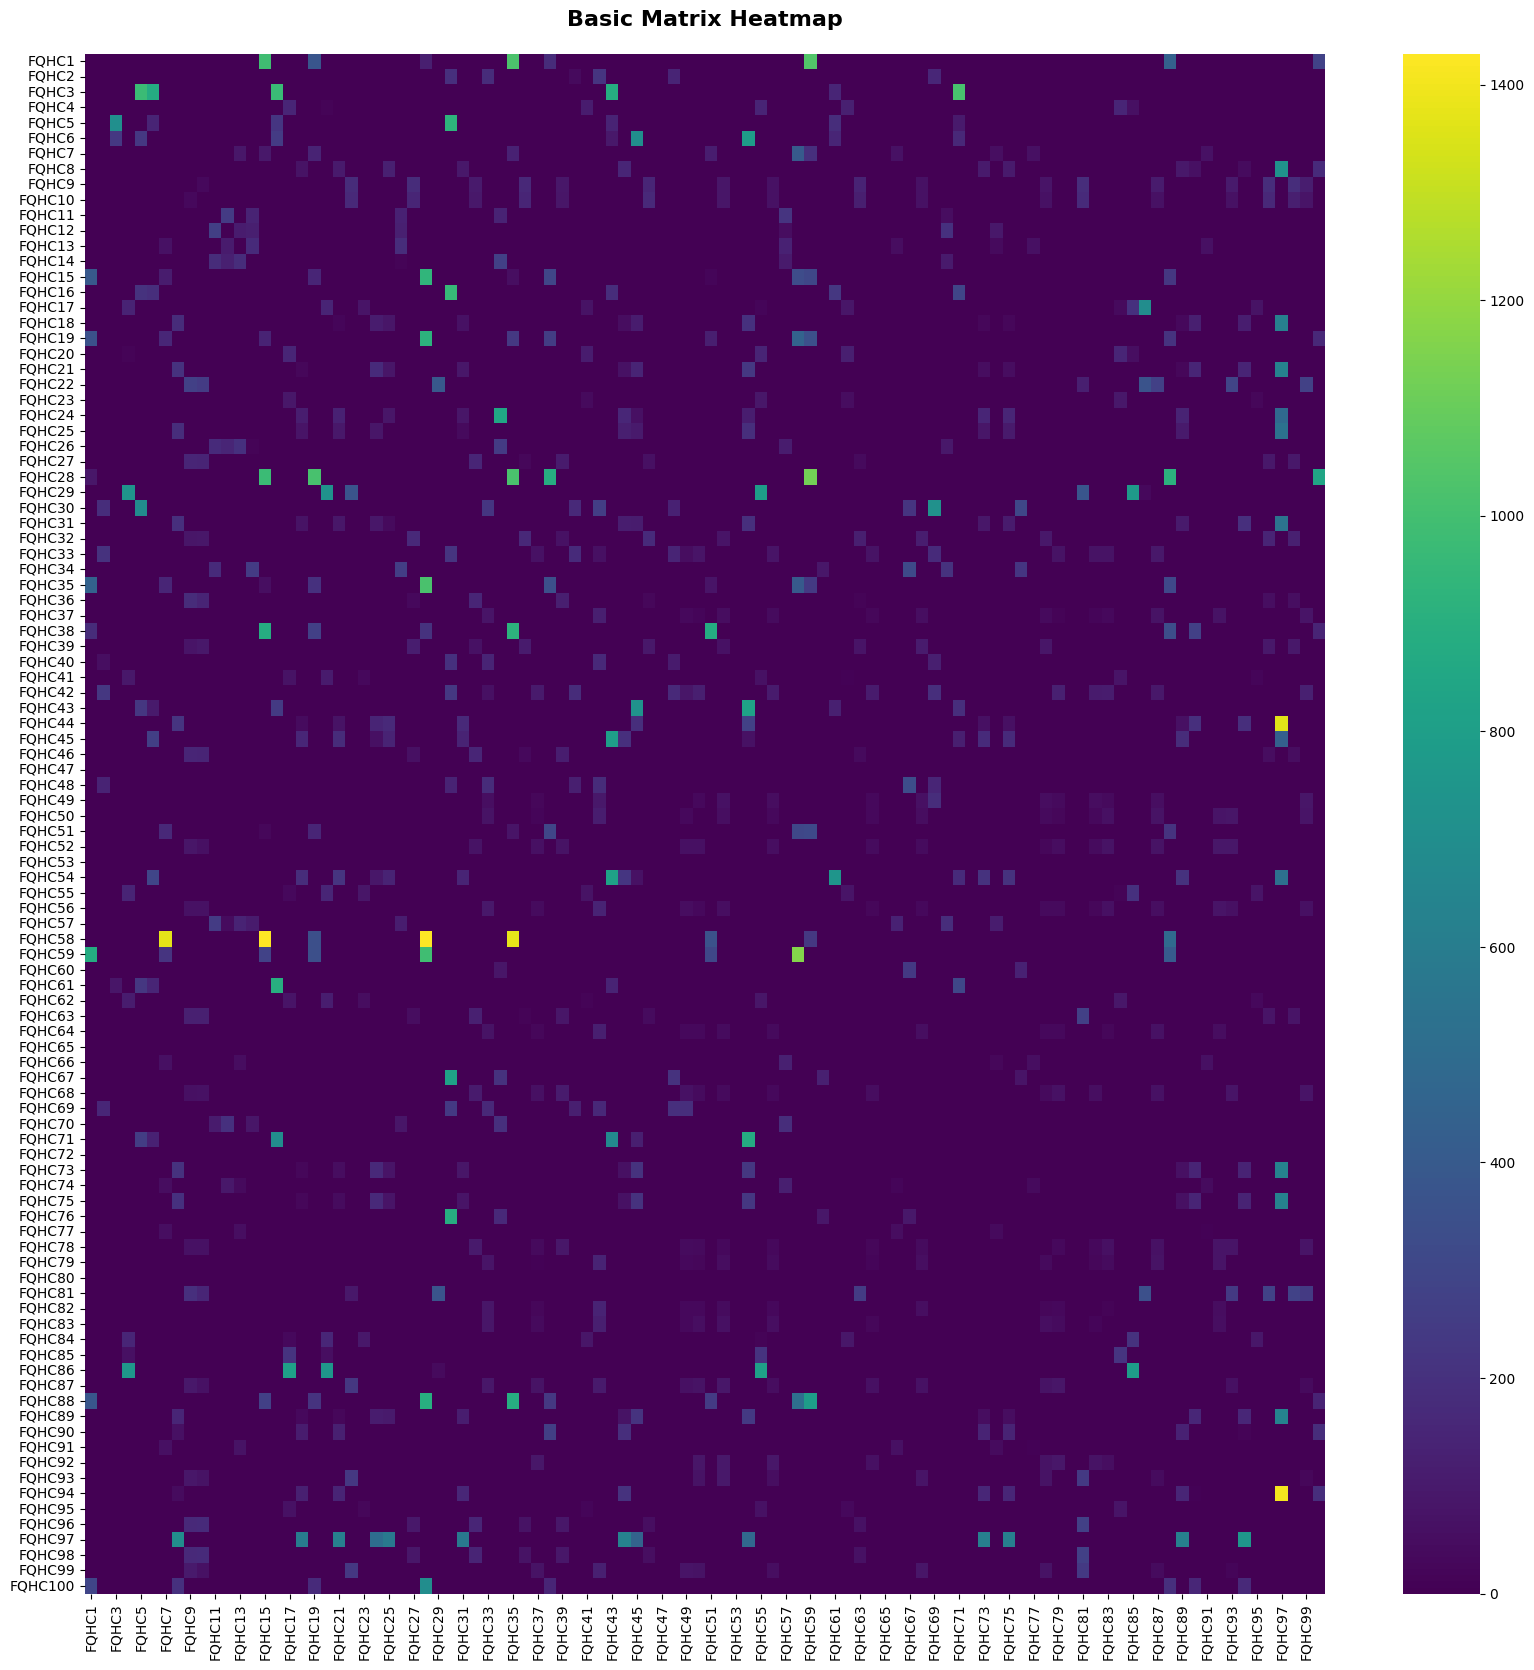

In [8]:
# creating subset of data of first 100 rows and columns
transit_100 = transit_data.iloc[:100, :100]
# 100 x 100 matrix
plt.figure(figsize=(20, 20))

sns.heatmap(transit_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

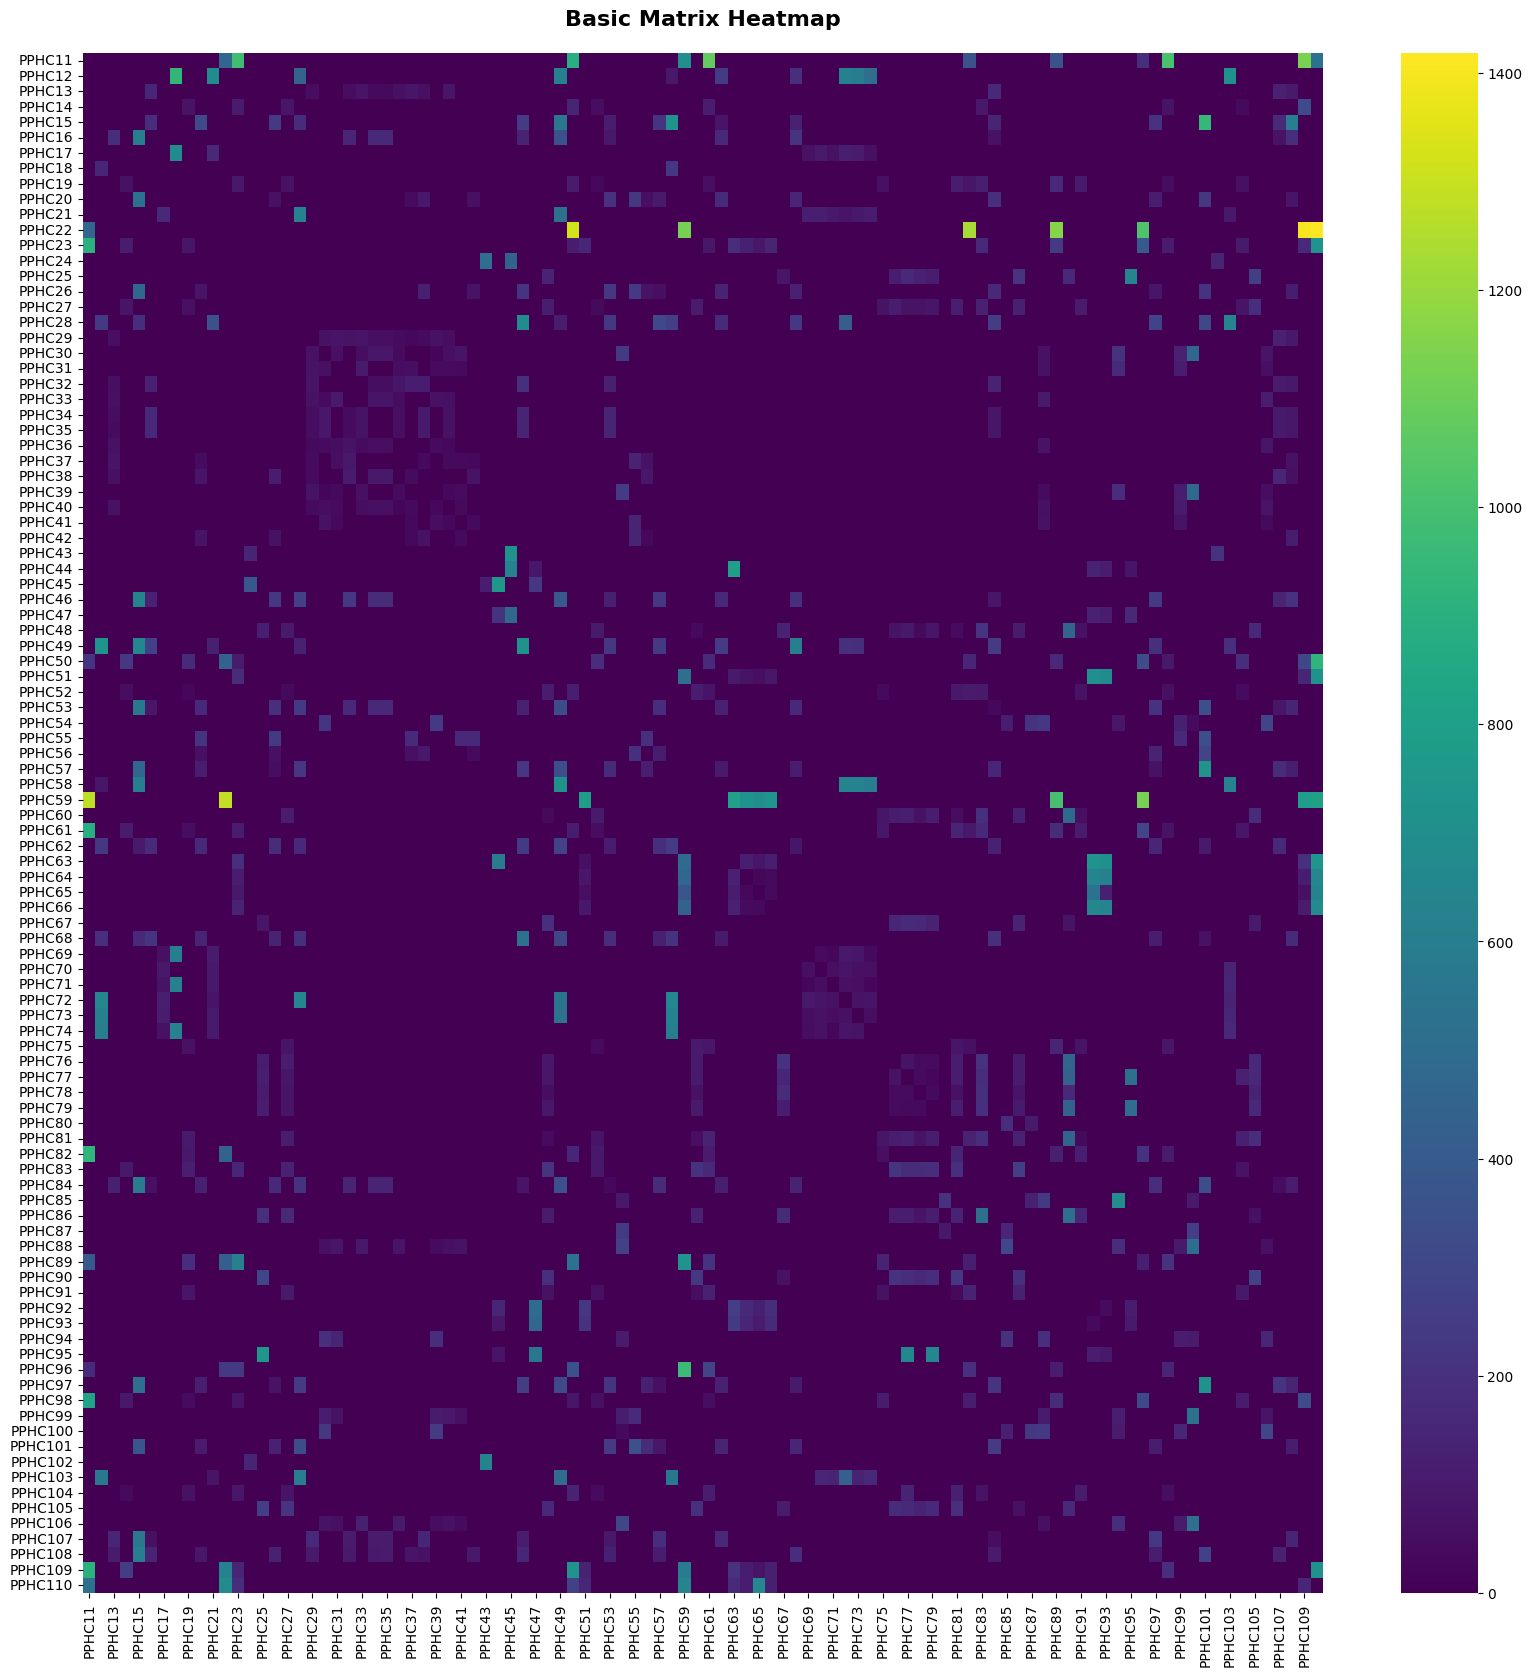

In [9]:
# heatmap of last 100 rows and columns
transit_last_100 = transit_data.iloc[-100:, -100:]
plt.figure(figsize=(20, 20))

sns.heatmap(transit_last_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

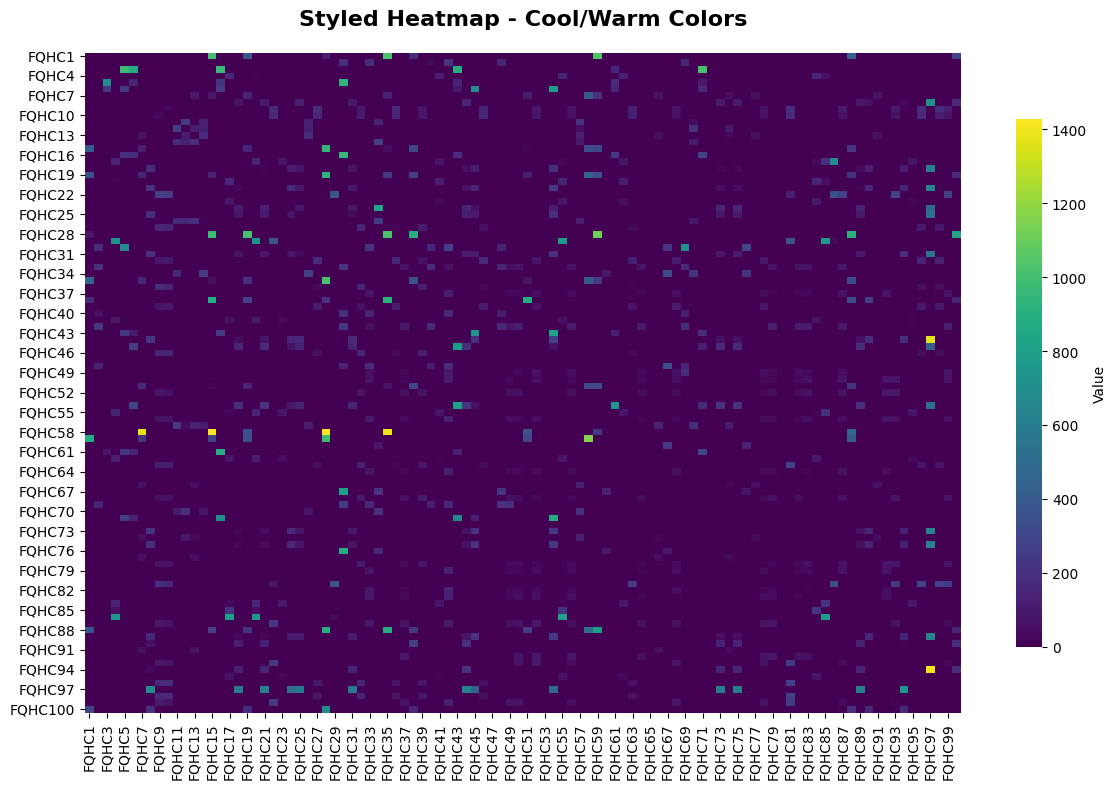

In [10]:
# Styled Heatmap with Color Map
plt.figure(figsize=(12, 8))

sns.heatmap(transit_100,
            annot=False,
            cmap='viridis',  # Using a different colormap
            cbar_kws={'label': 'Value', 'shrink': 0.8})

plt.title("Styled Heatmap - Cool/Warm Colors", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#### Creating correlation map

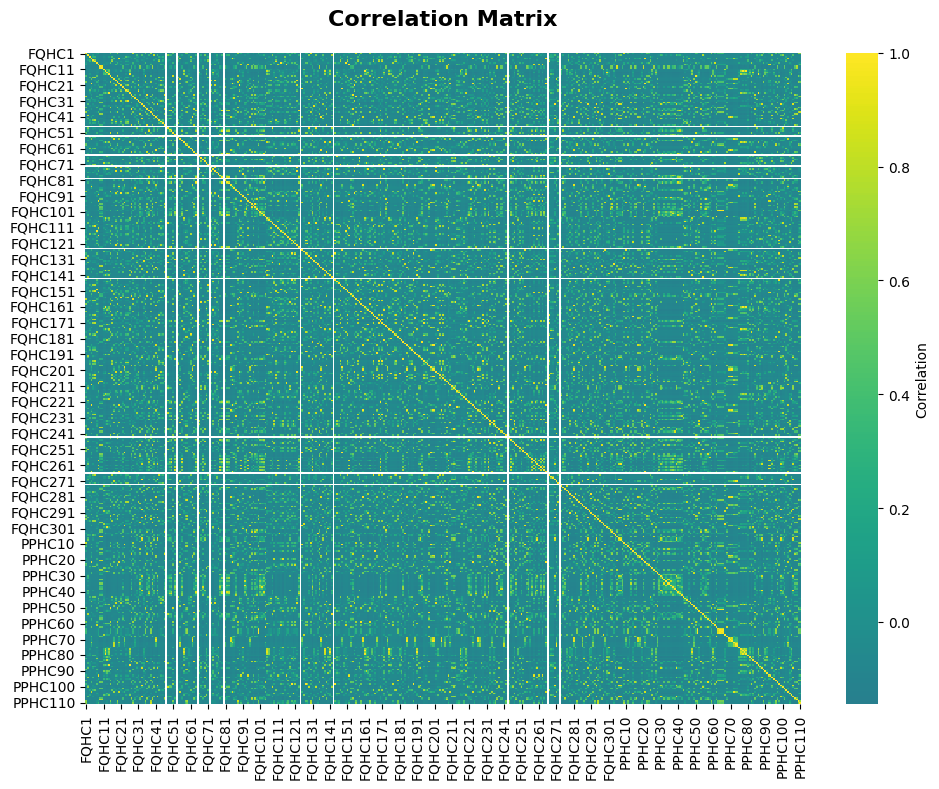

In [11]:
corr_transit = transit_data.corr()

# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_transit,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

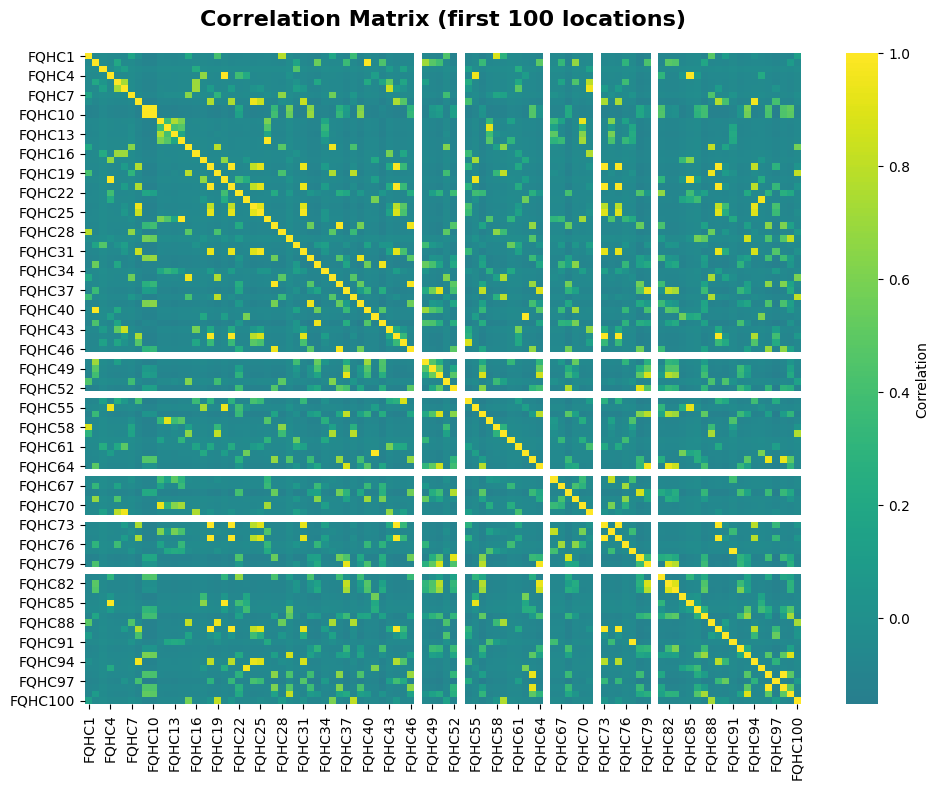

In [12]:
# correlation heatmap for 100 x 100 matrix
corr_data_100 = transit_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_data_100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (first 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

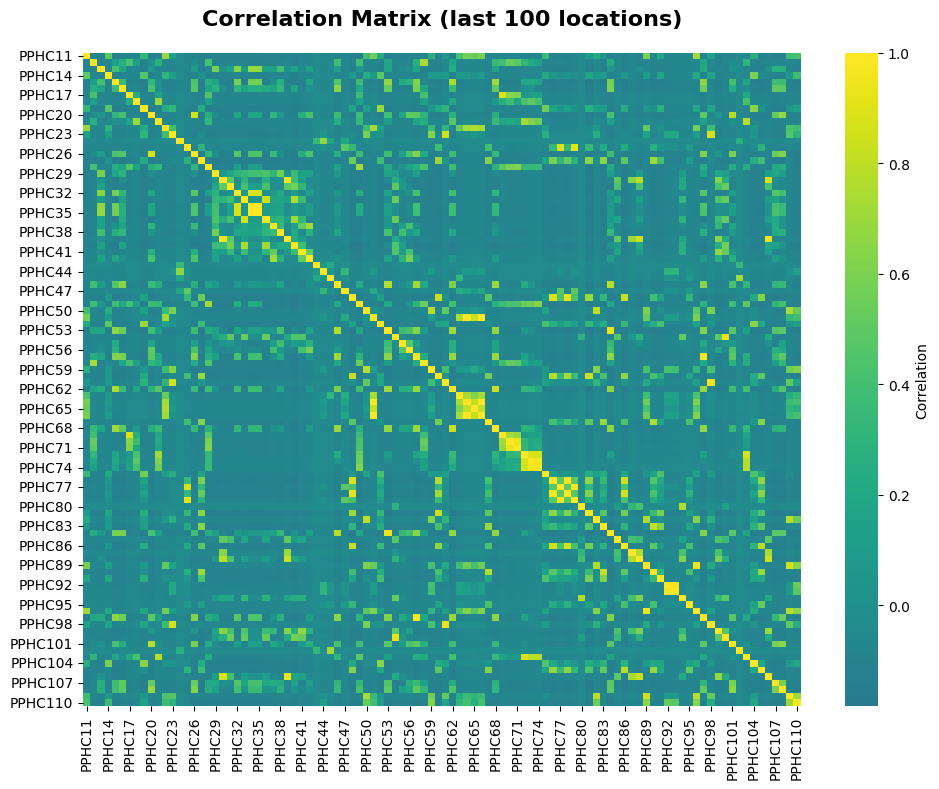

In [13]:
# correlation heatmap for last 100 x 100 matrix
corr_last_100 = transit_last_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_last_100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (last 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Transit Matrix for FQHCs

In [36]:
# xlxs file reading
fqhc_data = pd.read_csv('transit_matrix_fqhc.csv', 
                        #sheet_name='Matrix_Data',  # Sheet name
                        index_col=0,               # First column as index
                        header=0)                  # First row as headers

# Convert to numeric
fqhc_data = fqhc_data.apply(pd.to_numeric, errors='coerce')

print(f"Data shape: {fqhc_data.shape}")
print("First few rows:")
print(fqhc_data.head())

Data shape: (301, 302)
First few rows:
       Unnamed: 0  FQHC1       FQHC2  FQHC3  FQHC4       FQHC5  FQHC6  FQHC7  \
FQHC1         0.0    NaN         NaN    NaN    NaN         NaN    NaN    NaN   
FQHC2         NaN    0.0         NaN    NaN    NaN         NaN    NaN    NaN   
FQHC3         NaN    NaN    0.000000    NaN  416.3  335.150000    NaN    NaN   
FQHC4         NaN    NaN         NaN    0.0    NaN         NaN    NaN    NaN   
FQHC5         NaN    NaN  339.466667    NaN    0.0  164.016667    NaN    NaN   

       FQHC8  FQHC9  ...     FQHC292  FQHC293     FQHC294     FQHC295  \
FQHC1    NaN    NaN  ...  476.233333      NaN  168.716667         NaN   
FQHC2    NaN    NaN  ...         NaN   167.25         NaN         NaN   
FQHC3    NaN    NaN  ...         NaN      NaN         NaN  966.733333   
FQHC4    NaN    NaN  ...         NaN      NaN         NaN         NaN   
FQHC5    NaN    NaN  ...         NaN      NaN         NaN  796.700000   

       FQHC296  FQHC297  FQHC298  FQHC299

In [33]:
# cleaning data 
fqhc_data = fqhc_data.fillna(0)  # Fill NaN values with 0
print(fqhc_data.head())

       Unnamed: 0  FQHC1       FQHC2  FQHC3  FQHC4       FQHC5  FQHC6  FQHC7  \
FQHC1         0.0    0.0    0.000000    0.0    0.0    0.000000    0.0    0.0   
FQHC2         0.0    0.0    0.000000    0.0    0.0    0.000000    0.0    0.0   
FQHC3         0.0    0.0    0.000000    0.0  416.3  335.150000    0.0    0.0   
FQHC4         0.0    0.0    0.000000    0.0    0.0    0.000000    0.0    0.0   
FQHC5         0.0    0.0  339.466667    0.0    0.0  164.016667    0.0    0.0   

       FQHC8  FQHC9  ...     FQHC292  FQHC293     FQHC294     FQHC295  \
FQHC1    0.0    0.0  ...  476.233333     0.00  168.716667    0.000000   
FQHC2    0.0    0.0  ...    0.000000   167.25    0.000000    0.000000   
FQHC3    0.0    0.0  ...    0.000000     0.00    0.000000  966.733333   
FQHC4    0.0    0.0  ...    0.000000     0.00    0.000000    0.000000   
FQHC5    0.0    0.0  ...    0.000000     0.00    0.000000  796.700000   

       FQHC296  FQHC297  FQHC298  FQHC299  FQHC300  FQHC301  
FQHC1      0.0    

#### Creating heatmap and correlation map

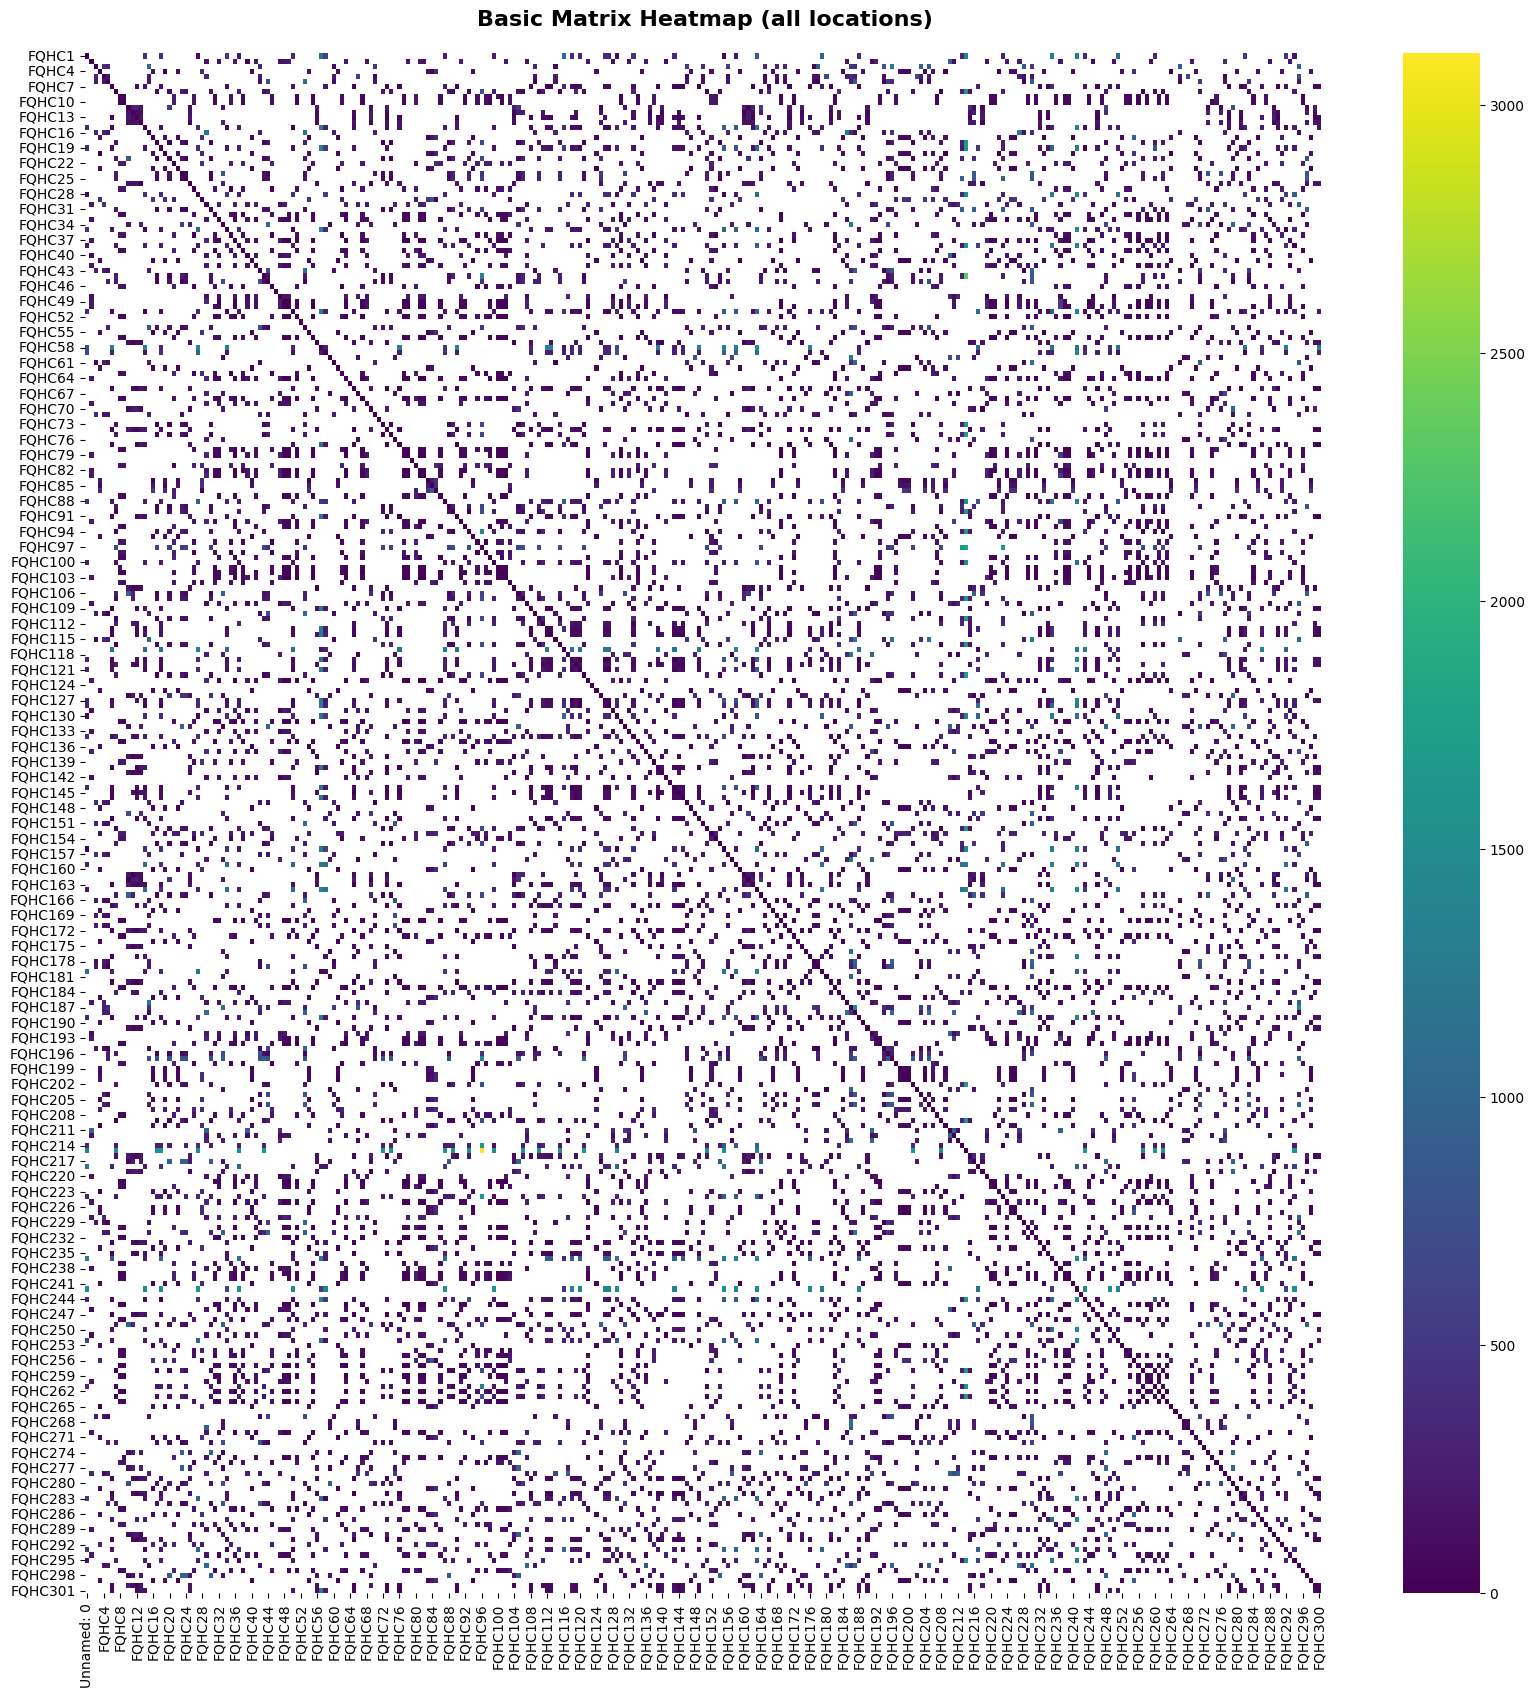

In [37]:
# Basic Heatmap
plt.figure(figsize=(20, 20))

sns.heatmap(fqhc_data, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap (all locations)", fontsize=16, fontweight='bold', pad=20)
plt.show()

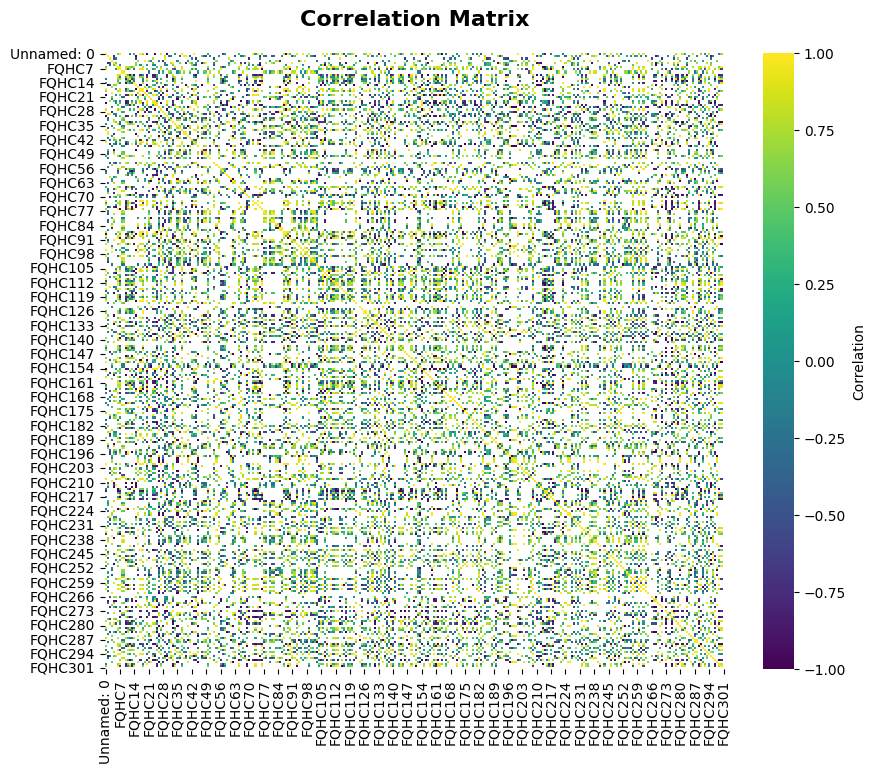

In [ ]:
corr_fqhc = fqhc_data.corr()

# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_fqhc,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.show()

# NOTE: White space is due to lack of transit path between locations

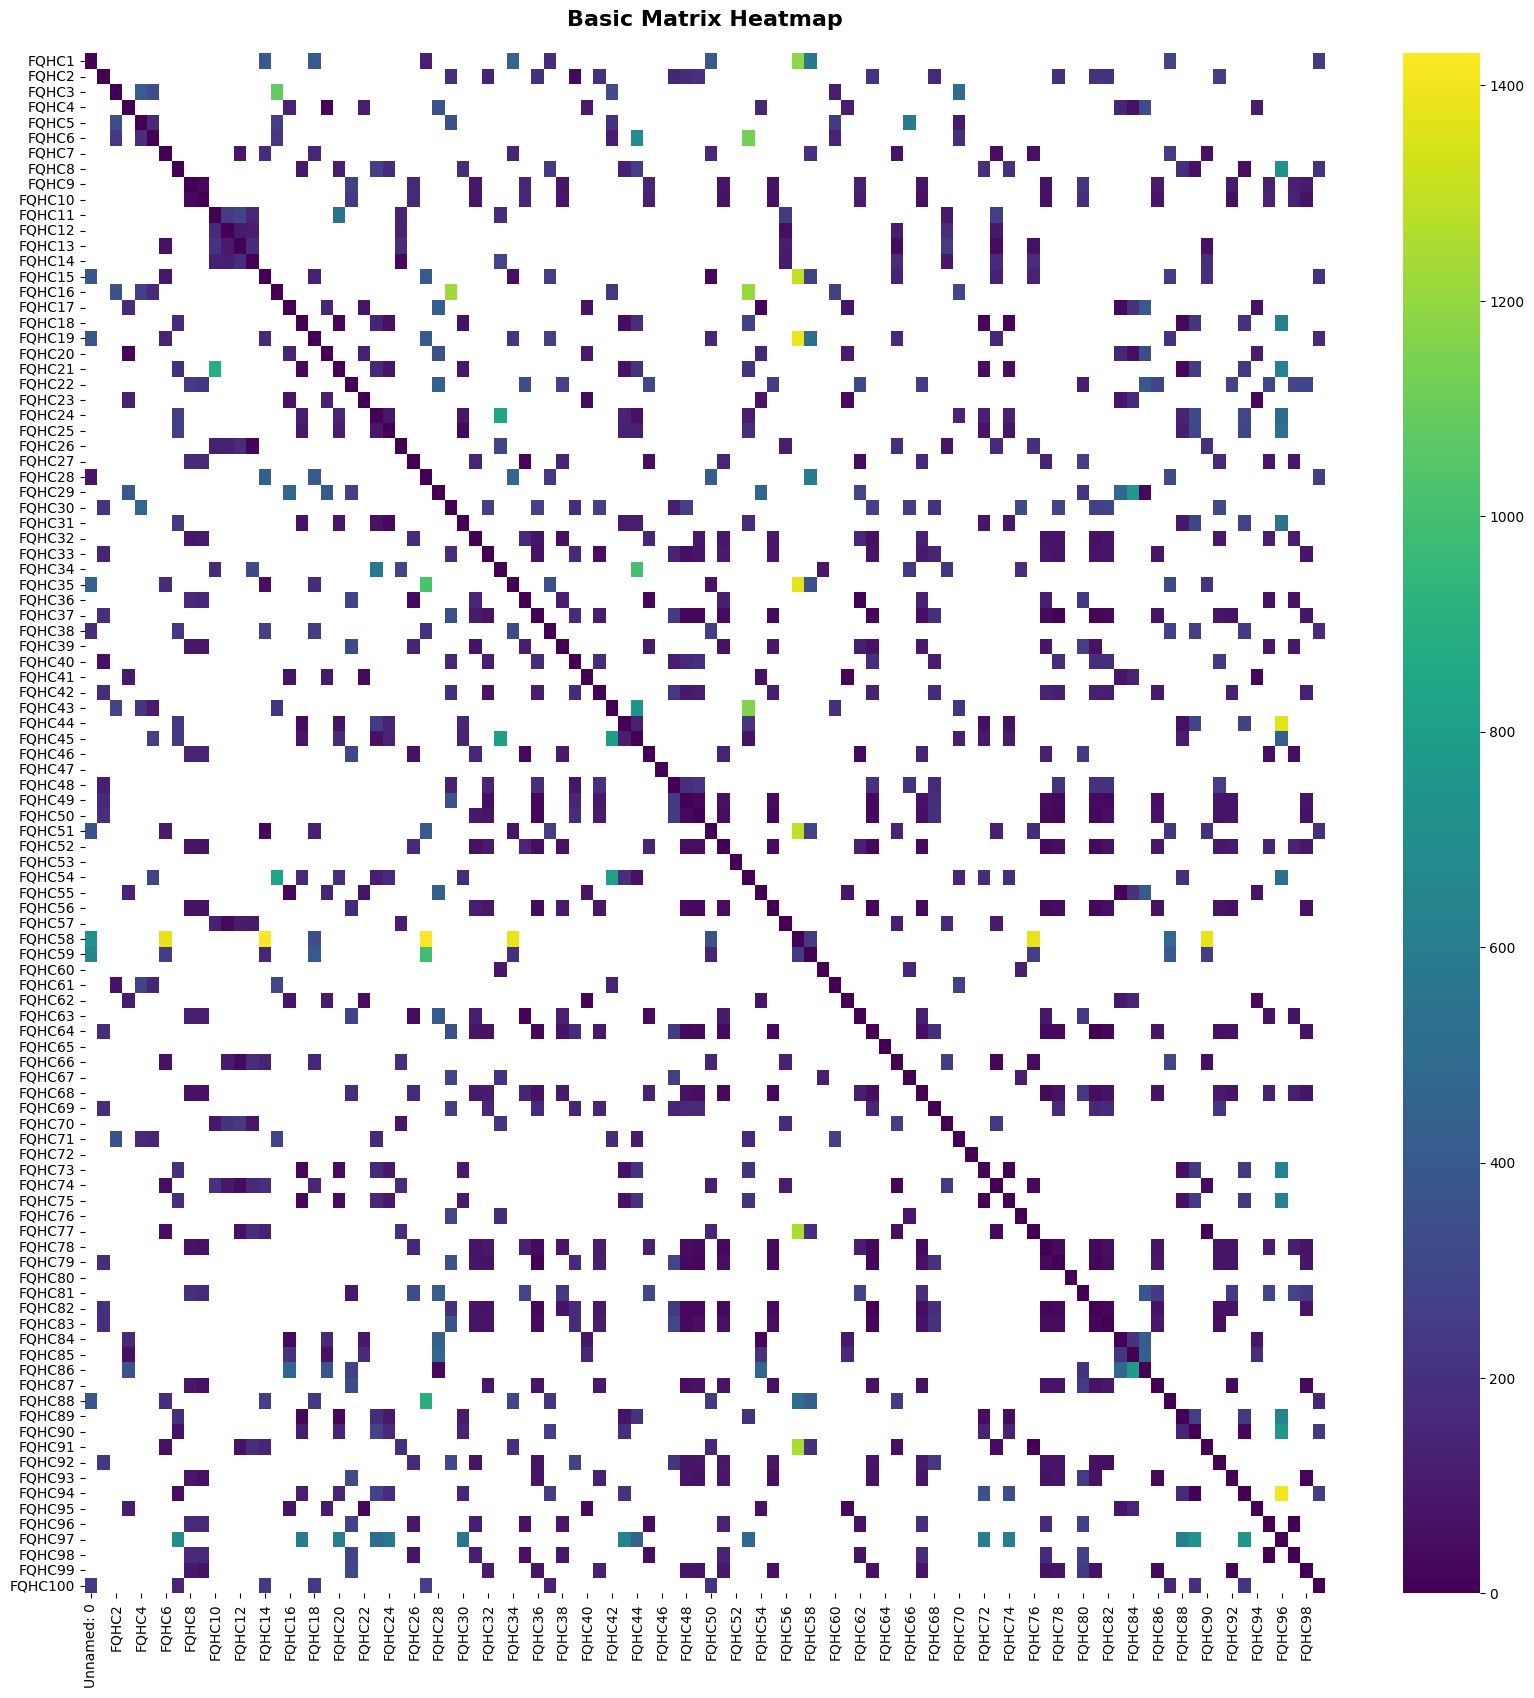

In [39]:
# creating subset of data of first 100 rows and columns
fqhc_100 = fqhc_data.iloc[:100, :100]
# 100 x 100 matrix
plt.figure(figsize=(20, 20))

sns.heatmap(fqhc_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

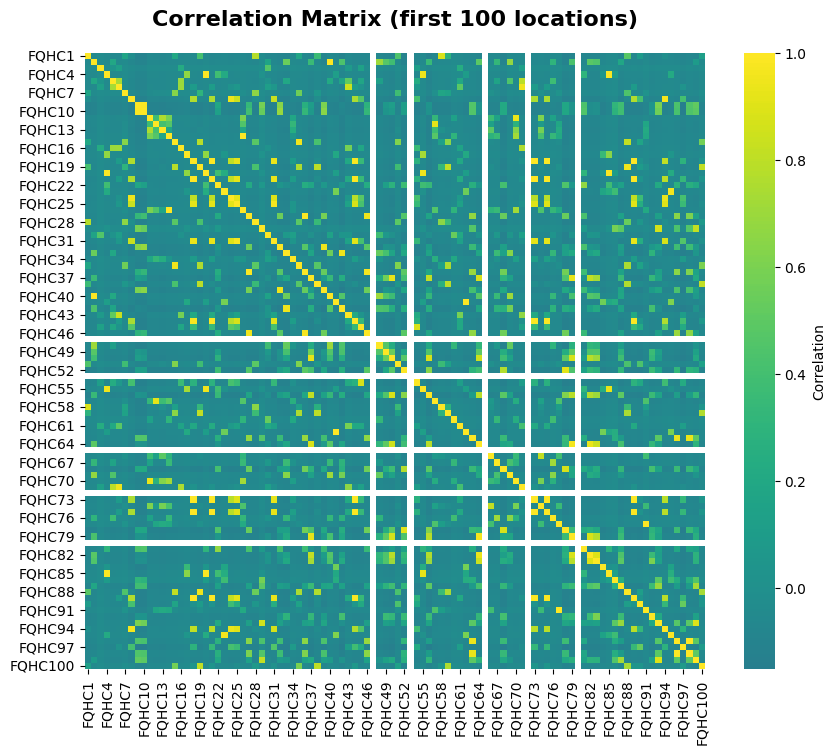

In [41]:
# correlation heatmap for 100 x 100 matrix
corr_fqhc_100 = fqhc_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_data_100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (first 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.show()


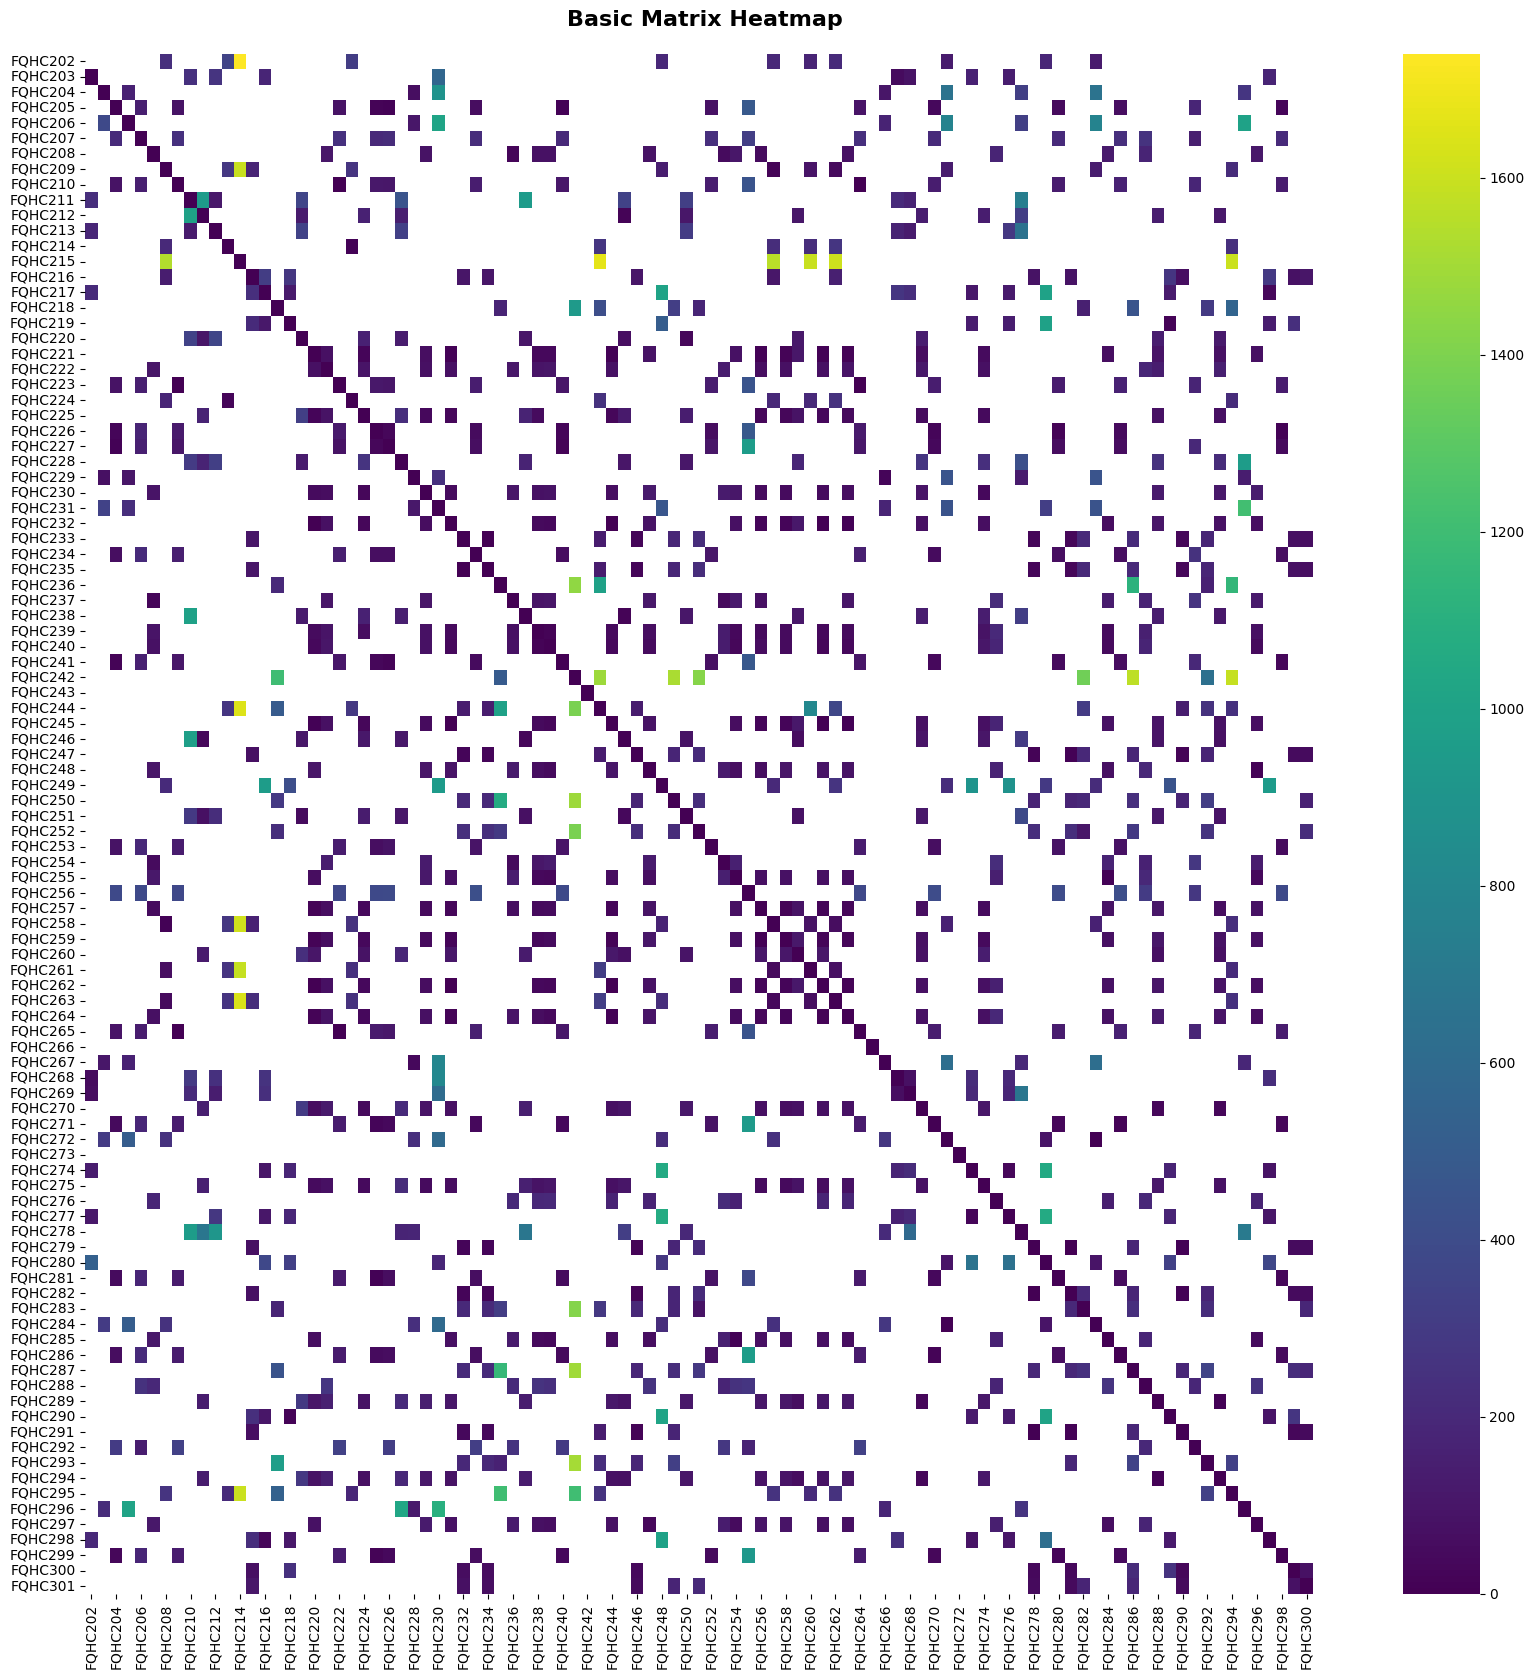

In [42]:
# for the last 100 
fqhc_last_100 = fqhc_data.iloc[-100:, -100:]
# 100 x 100 matrix
plt.figure(figsize=(20, 20))

sns.heatmap(fqhc_last_100, 
            annot=False,          # Show values in cells
            cmap='viridis')       # Color scheme

plt.title("Basic Matrix Heatmap", fontsize=16, fontweight='bold', pad=20)
plt.show()

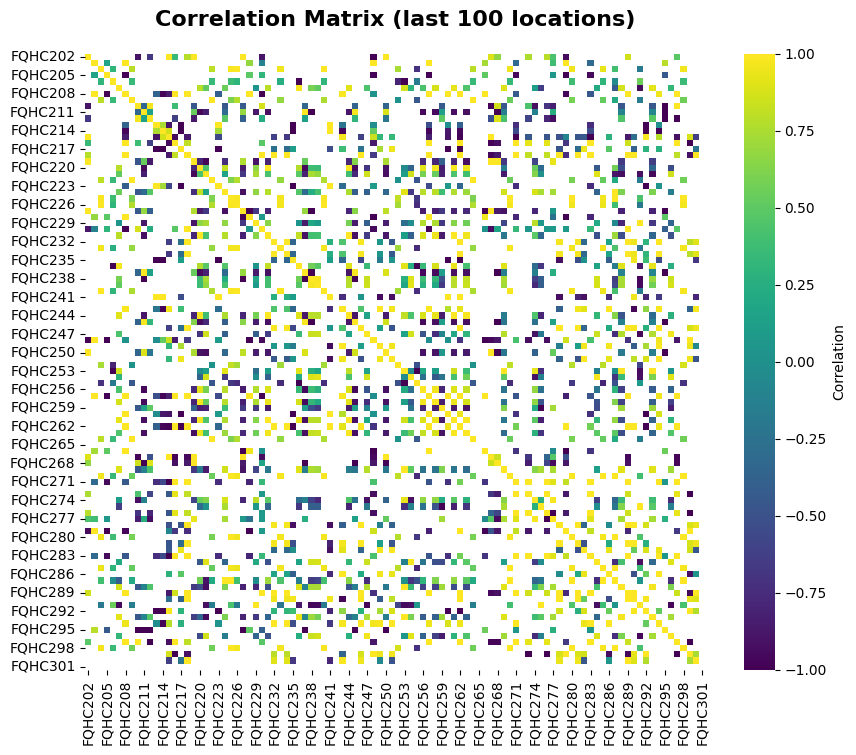

In [43]:
# correlation heatmap for 100 x 100 matrix
corr_fqhc_l100 = fqhc_last_100.corr()
# Plot correlation heatmap for all data
plt.figure(figsize=(10, 8))

sns.heatmap(corr_fqhc_l100,
            annot=False,
            cmap='viridis',
            center=0,  # Center colormap at 0
            cbar_kws={'label': 'Correlation'})

plt.title("Correlation Matrix (last 100 locations)", fontsize=16, fontweight='bold', pad=20)
plt.show()